<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/muon_halflife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Extract Data from File

In [25]:
file = "https://raw.githubusercontent.com/AndrewCrossman/PHYS646/main/andrew_data_cut.mca"
data = pd.read_csv(file)

In [26]:
def func1(x,a,b):
  return a*x+b

In [27]:
def func2(x, a, b, c):
    return a * np.exp(-b * x) + c

Extract Dependent Variable Values (Counts)

In [28]:
data["Count"] = data["Count"].astype(float)
data_ar = data["Count"].to_numpy()
y = data_ar

In [29]:
data

,Count
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1019,42.0
1020,33.0
1021,54.0
1022,44.0


In [30]:
print(y)

[ 0.  0.  0. ... 54. 44. 42.]


Extract Independent Variable Values (Convert Channels to Times)

In [31]:
x = np.linspace(1,1024,1024)
x

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.022e+03, 1.023e+03,
       1.024e+03])

In [32]:
#Channel Number vs Time
x1 = [135, 218, 280, 394, 491, 632, 734, 797, 881, 966]
y1 = [2.690, 4.130, 5.250, 7.570, 9.330, 12.05, 13.97, 15.17, 16.85, 18.37]
y1err = [.0005 for x in y1]

In [33]:
popt1, pcov1 = optimize.curve_fit(func1,x1,y1)

In [34]:
print(popt1)
print(pcov1)

[0.01901929 0.024139  ]
[[ 5.04639218e-09 -2.78964410e-06]
 [-2.78964410e-06  1.92931587e-03]]


In [35]:
((5.04639218*10**-9)**2+(1.92931587*10**-3)**2)**(1/2)

0.0019293158700065998

The plot below tells us that each channel is worth 0.01901929 $\pm$ 5.04639218e-09 + 0.024139 $\pm$ 1.92931587e-03
The error in time for the fit is .0019 us


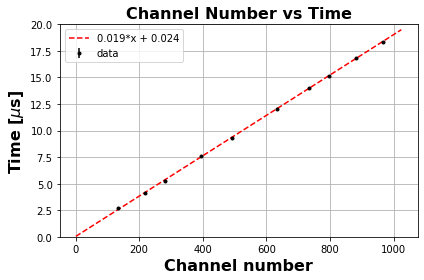

In [36]:
x1 = [135, 218, 280, 394, 491, 632, 734, 797, 881, 966]
y1 = [2.690, 4.130, 5.250, 7.570, 9.330, 12.05, 13.97, 15.17, 16.85, 18.37]
y1err = [.0005 for x in y1]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,func1(x,*popt1), "--r", label="{0:.3f}*x + {1:.3f}".format(popt1[0],popt1[1]))
ax.errorbar(x1,y1, yerr=y1err, fmt=".k", label="data")
ax.set_title(r'Channel Number vs Time', fontsize=16, fontweight='bold')
ax.set_xlabel(r'Channel number', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Time [$\mu$s]', fontsize=16, fontweight='bold')
ax.set_ylim(0,20)
ax.legend()
ax.grid()
plt.tight_layout()
#plt.savefig('channel_time.png')
#files.download('channel_time.png')
print(r'The plot below tells us that each channel is worth 0.01901929 $\pm$ 5.04639218e-09 + 0.024139 $\pm$ 1.92931587e-03')
print("The error in time for the fit is .0019 us")

In [37]:
# cut the data to help the fit
x = [popt1[0]*i+popt1[1] for i in x]
x = x[11:]
y = y[11:]

In [38]:
popt, pcov = optimize.curve_fit(func2,x,y)
print(popt)
print(pcov)

[8.98541971e+02 4.71588902e-01 4.31061272e+01]
[[8.17624798e+00 4.46904024e-03 1.28107812e-01]
 [4.46904024e-03 4.95096827e-06 5.92274227e-04]
 [1.28107812e-01 5.92274227e-04 2.52132924e-01]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


In [47]:
y3 = [popt[0]*np.exp(-i*popt[1])+popt[2] for i in x]
yerr = [np.sqrt(n) for n in y]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

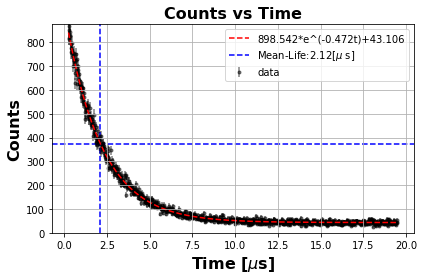

In [48]:
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.errorbar(x,y, yerr=yerr,fmt=".k", label="data", alpha=.5,zorder=0)
ax1.plot(x,y3, "--r", label=r'{0:.3f}*e^(-{1:.3f}t)+{2:.3f}'.format(popt[0],popt[1],popt[2]),zorder=1)
ax1.axhline(373,linestyle='dashed',color="b", zorder=0, label=r'Mean-Life:2.12[$\mu$ s]')
ax1.vlines(2.12,0,875, linestyle='dashed',color="b",zorder=0)
ax1.set_title(r'Counts vs Time', fontsize=16, fontweight='bold')
ax1.set_xlabel(r'Time [$\mu$s]', fontsize=16, fontweight='bold')
ax1.set_ylabel(r'Counts', fontsize=16, fontweight='bold')
ax1.set_ylim(0,875)
ax1.legend()
ax1.grid()
plt.tight_layout()
plt.savefig('HL_with_falsedoubles.png')
files.download('HL_with_falsedoubles.png')

In [40]:
x[0]

0.2523704302740811

In [41]:
print("Mean lifetime: "+str(1/.471588902)+"+/-"+str((4.95096827*10**-6)/(.471588902**2)))

Mean lifetime: 2.1204909525203375+/-2.2261939113126682e-05


In [42]:
# Error in the half life from the plot above
a = 8.98541971*10**2
b =.471588902
c = 43.1061272
sa = 8.17624798
sb = 4.95096827*10**-6
sc = .252132924
t = .2523704302740811
st = .0019
y_2 = 398.81889877
s1 = (1/2)*np.sqrt( (a*np.exp(-b*t)*b*st)**2 + sc**2 )
s2 = np.sqrt(s1**2 + sc**2)
s3 = (y_2-c)/a * np.sqrt( (s2/(y_2-c))**2 + (sa/a)**2 )
s4 = s3/((y_2-c)/a)
s5 = np.log((y_2-c)/a)/(-b) * np.sqrt( (s4/np.log((y_2-c)/a))**2 + (sb/b)**2 )
s5

0.019485193494826754